# Import packages

In [1]:
import stochpy
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import mpmath


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

# Basic Examples

## Immigration-death model

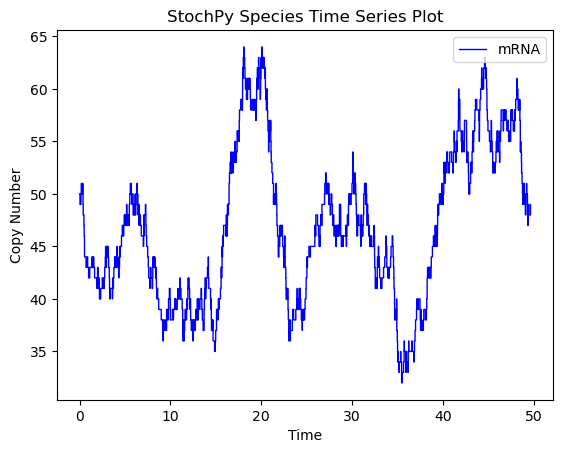

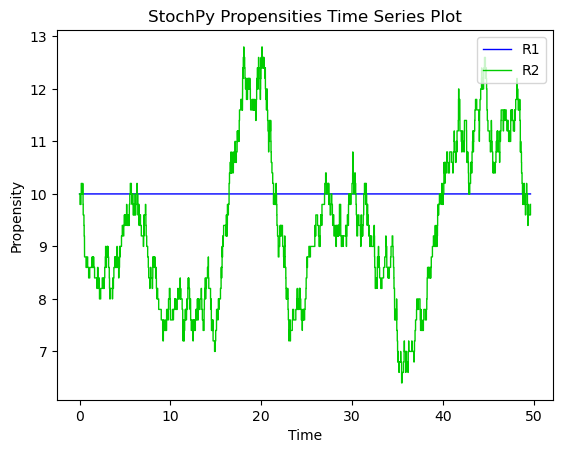

In [2]:
smod = stochpy.SSA()
smod.DoStochSim(IsTrackPropensities=True)
smod.PlotSpeciesTimeSeries(title = 'StochPy Species Time Series Plot')
stochpy.plt.savefig('immigration_death_basic1.png')
smod.PlotPropensitiesTimeSeries(title = 'StochPy Propensities Time Series Plot')
stochpy.plt.savefig('immigration_death_basic2.png')

## Dimerization model

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


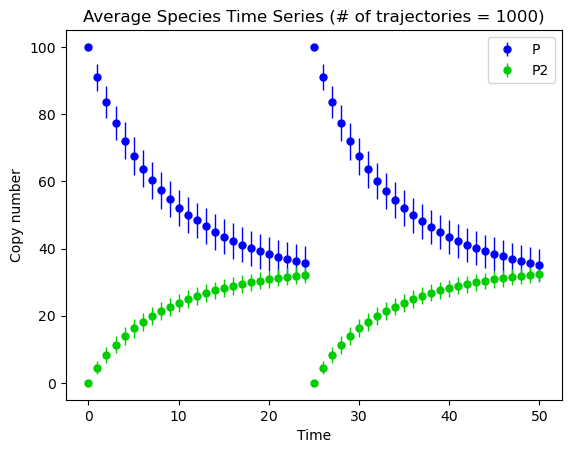

In [3]:
smod = stochpy.SSA()
smod.Model('dsmts-003-03.xml.psc')
smod.DoStochSim(end = 50, mode = 'time', trajectories = 1000)
smod.PlotAverageSpeciesTimeSeries()
stochpy.plt.savefig('dimerization1.png')

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


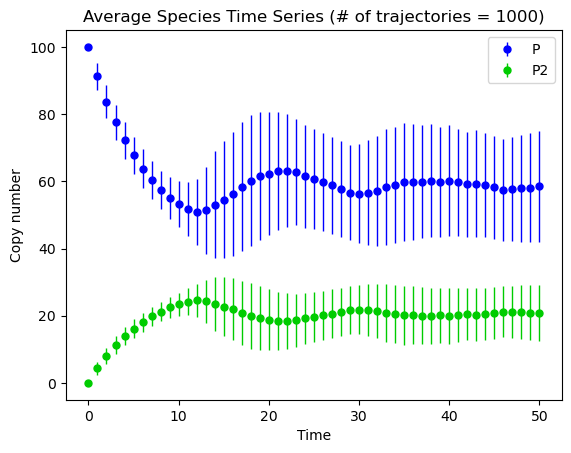

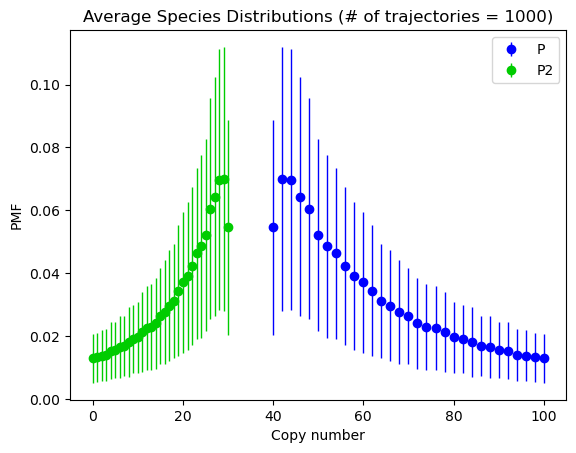

In [4]:
smod = stochpy.SSA()
smod.Model('dsmts-003-04.xml.psc')
smod.DoStochSim(end = 50,mode = 'time',trajectories = 1000)
smod.PlotAverageSpeciesTimeSeries()
stochpy.plt.savefig('dimerization2.png')
smod.PlotAverageSpeciesDistributions()
stochpy.plt.savefig('dimerization3.png')

## Decaying dimerizing model

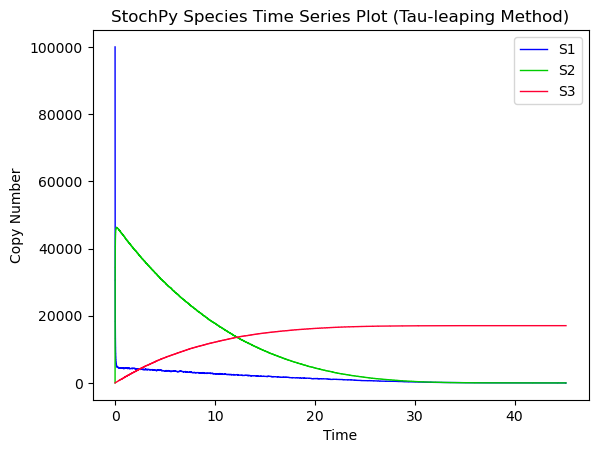

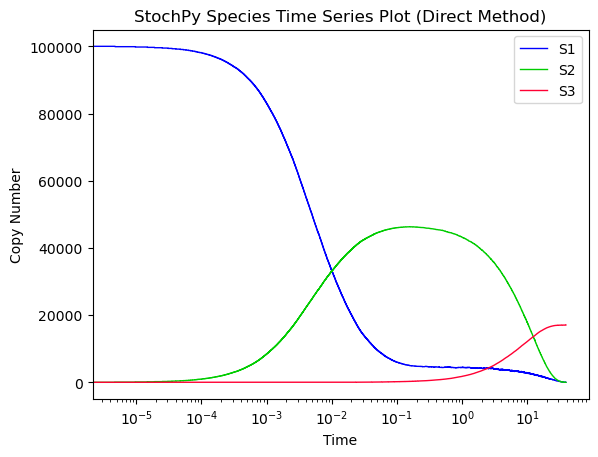

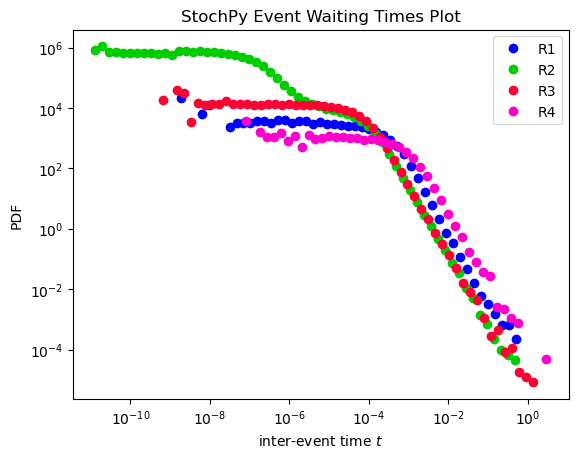

In [17]:
smod = stochpy.SSA()
smod.Model('DecayingDimerizing.psc')
smod.DoStochSim(method='TauLeaping', end=50, mode='time')
smod.PlotSpeciesTimeSeries(title='StochPy Species Time Series Plot (Tau-leaping Method)')
stochpy.plt.savefig('decaying_dimerizing1.png')
smod.DoStochSim(method='Direct', end=50, mode='time')
smod.PlotSpeciesTimeSeries(title='StochPy Species Time Series Plot (Direct Method)')
stochpy.plt.savefig('decaying_dimerizing2.png')
stochpy.plt.savefig('decaying_dimerizing3.png')

## Isomerization reaction with and without delay

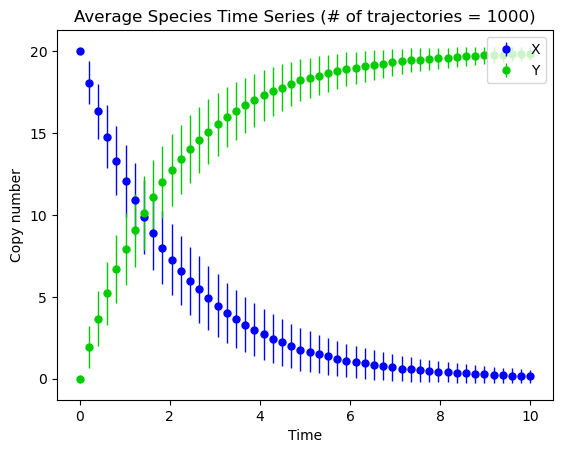

In [6]:
smod.Model('Isomerization.psc')
smod.DoStochSim(mode='time', end=10,trajectories=1000)
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries()
stochpy.plt.savefig('isomerization1.png')

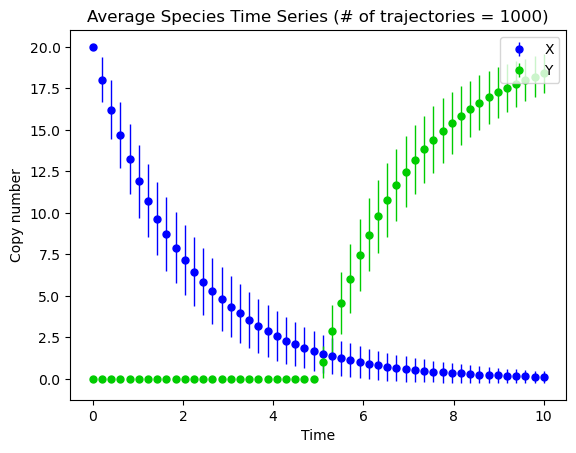

In [7]:
smod.SetDelayParameters({'R1':('fixed',5)})
smod.DoDelayedStochSim(mode='time',end=10,trajectories=1000)
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries()
stochpy.plt.savefig('isomerization2.png')

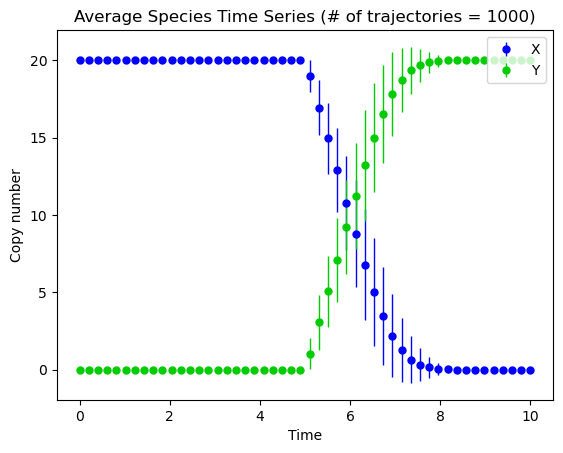

In [8]:
smod.SetDelayParameters({'R1':('fixed',5)},nonconsuming_reactions=['R1'])
smod.DoDelayedStochSim(mode='time',end=10,trajectories=1000)
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries()
stochpy.plt.savefig('isomerization3.png')

# Advanced examples

## Immigration-death model

#################### 
just ran this line
just ran this line
####################
Species	Mean
mRNA	49.947
Species	Standard Deviation
mRNA	7.057


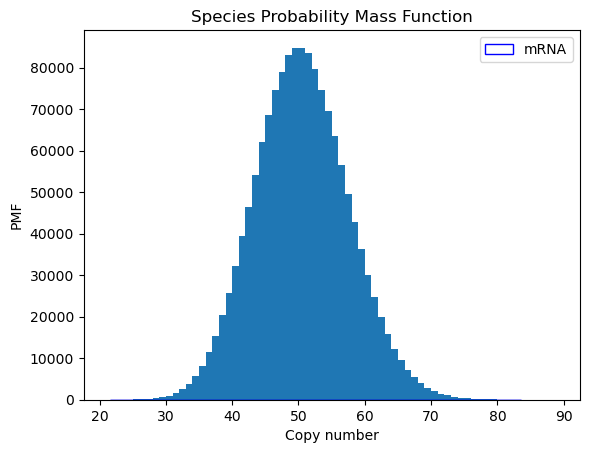

In [15]:
smod = stochpy.SSA()
lambda_ = 50
N = 1500000
data = np.random.poisson(lambda_,N)
smod.Model('ImmigrationDeath.psc')  # Ksyn = 10, Kdeg = 0.2, and mRNA(init) = 50
smod.DoStochSim(end=N,mode='steps')
smod.PlotSpeciesDistributions(linestyle= 'solid')
n, bins, patches = stochpy.plt.hist(data, max(data)-min(data))
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()
stochpy.plt.title('Species Probability Mass Function')
stochpy.plt.savefig('immigration_death_advanced.png')

## Burst Model: Time series

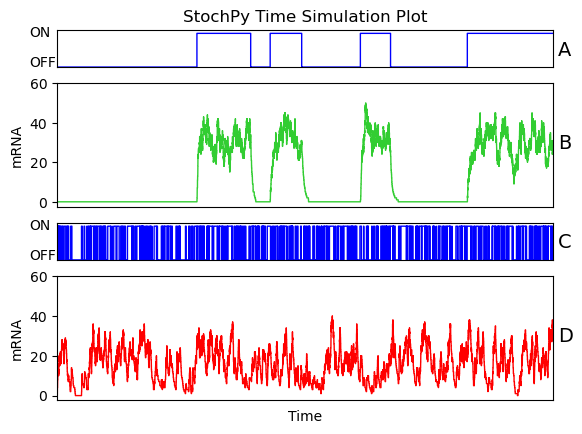

In [14]:
sim_end = 100
smod = stochpy.SSA()
smod.Model('Burstmodel.psc')
smod.ChangeParameter("kon",0.05)
smod.ChangeParameter("koff",0.05)
smod.DoStochSim(end=sim_end,mode='time',trajectories = 1)

# Use a nice grid to plot 4 figures
gs = gridspec.GridSpec(4,1,width_ratios=[1],height_ratios=[0.3,1,0.3,1])
ax1 = stochpy.plt.subplot(gs[0])

smod.PlotSpeciesTimeSeries(species2plot ='ONstate',xlabel ='',ylabel ='')
stochpy.plt.legend('',frameon=False) # remove legend
stochpy.plt.xlim([0,sim_end])        # set x lim
stochpy.plt.xticks([])               # remove x ticks
stochpy.plt.ylim([0,1.1])            # set y lim
stochpy.plt.yticks([])               # remove y lim
stochpy.plt.text(-5.5,0.9,'ON')      
stochpy.plt.text(-5.5,0,'OFF')
stochpy.plt.text(101,0.35,'A',fontsize = 14)
stochpy.plt.title('StochPy Time Simulation Plot')

ax2 = stochpy.plt.subplot(gs[1])
smod.plot.ResetPlotnum()
smod.PlotSpeciesTimeSeries(species2plot ='mRNA',colors = ['#32CD32'])
stochpy.plt.xlim([0,sim_end])
stochpy.plt.legend('',frameon=False)
stochpy.plt.xticks([])
stochpy.plt.title('')
stochpy.plt.xlabel('')
stochpy.plt.ylabel('mRNA')
stochpy.plt.yticks([0,20,40,60])
stochpy.plt.text(101,27,'B',fontsize = 14)

smod.ChangeParameter("kon",5.0)
smod.ChangeParameter("koff",5.0)
ax3 = stochpy.plt.subplot(gs[2])
smod.plot.ResetPlotnum()
smod.DoStochSim(end=sim_end,mode='time')
smod.PlotSpeciesTimeSeries(species2plot ='ONstate',xlabel ='',ylabel ='')
stochpy.plt.title('')
stochpy.plt.legend('',frameon=False)
stochpy.plt.xlim([0,sim_end])
stochpy.plt.xticks([])
stochpy.plt.ylim([0,1.1])
stochpy.plt.yticks([])
stochpy.plt.text(-5.5,0.9,'ON')
stochpy.plt.text(-5.5,0,'OFF')
stochpy.plt.text(101,0.35,'C',fontsize = 14)

ax4 = stochpy.plt.subplot(gs[3])
smod.plot.ResetPlotnum()
smod.PlotSpeciesTimeSeries(species2plot ='mRNA',colors = ['r'])
stochpy.plt.xlim([0,sim_end])
stochpy.plt.legend('',frameon=False)
stochpy.plt.xticks([])
stochpy.plt.title('')
stochpy.plt.ylabel('mRNA')
stochpy.plt.yticks([0,20,40,60])
stochpy.plt.text(101,27,'D',fontsize = 14)
stochpy.plt.savefig('burst_timeseries.png')